<a href="https://colab.research.google.com/github/hemanth346/EIP4/blob/master/Week1/Bascis_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To Do
Create a CNN architecture using only convolution layers, pooling layers and build a model that classifies MNIST data with test accuracy of more than 99% 

#### Constraints:
Use/consider concepts discussed in class 
- Convolutions
- Filters/kernel size - Using 3x3 (as it is Nvidia GPU accelerated)
- Channels/No. of filters
- MaxPooling (after completing 
- Magic Convolution (1x1 filter)
- Receptive Field
- epochs, batch size



**Note** : *Weights are randomly initialized, same model may give different results on each run.!!*





#### Summary : 
Tried 6 different network architectures, able to achieve 99%+ test accuracy model with 2 of them

Final network :

``` Input(28x28x1) -> [ C(32,3) -> C(64,3) -> M(2) ] *2 -> C(32,3) -> M(2) -> C(10,1) -> Flatten -> Softmax Classification  -> {20}```

---

```
Notation : 
- C(32,3)                   => Conv2D layer with 32 kernels of size (3x3x_)
- MP(2)                     => MaxPool2D layer with size 2
- Flat                      => Flatten layer
- [ layers ] * n            => layers block repeated n times
- {10}                      => epoch number
```

Note : 
- All models use same batch size of 32

- All the models are evaluated very few times and results are not average accuracy of multiple times.  Results may vary since the models weights are randomly initialized 

---


Approach and details below

1. First Network

```Input(28x28x1)-> [ C(32,3) -> C(64,3) -> M(2) -> C(32,1) ] * 2 ->C(32,3) -> MaxP(2) -> C(10,1) -> Flatten -> Softmax Classification  -> {10}```
    
    Test score : 0.9885     Epochs : 10
    Created network keeping in mind the constraints 
    Did transition (max pooling and 1x1 filters) after completing 5x5

2. Second Network

``` Input(28x28x1) -> C(32,3) -> C(64,3) -> M(2) -> C(32,3) -> C(64,3) -> C(128,3) -> M(2) -> C(3,10)  -> Flatten -> Softmax Classification  -> {20}```
    
    Test score : 0.6866     Epochs : 20
    Similar to above network but
    - No 1x1 filters after MaxPooling
    - Added additional Convolution layer after reaching 2nd 5x5 and before 2nd max pooling



3. Thrid Network

``` Input(28x28x1) -> [ C(64,3) -> C(128,3) -> M(2) -> C(32,1) ] * 2 -> C(32,3) -> M(2) -> C(10,1)  -> Flatten -> Softmax Classification  -> {20}```

    Test score : 0.693     Epochs : 20
    Same as first network but with more number of filters in each layer.
    - First layer 64 from 32 and likewise
    - Checking if increasing no. of filters helps

4. Fourth Network

``` Input(28x28x1) -> C(32,3) -> C(64,3) -> C(128,3) -> C(256,3) -> M(2) -> C(32,1) -> C(32,3) -> C(64,3) -> M(2) -> C(32,1) -> C(32,3) -> C(10,1)  -> Flatten -> Softmax Classification  -> {20}```
    
    Test score : 0.7885     Epochs : 20
    Did not do transition until reaching 11x11 receptive field and 256 filters
    - Checking if increasing receptive field helps(Intuitively it shouldn't help)
    - Checking if increasing no. of params helps

5. Fifth Network

``` Input(28x28x1) -> [ C(64,3) -> C(128,3) -> M(2) -> C(64,1) ] * 2 -> C(64,3) -> M(2) -> C(10,1)  -> Flatten -> Softmax Classification  -> {20}```

    Test score : 0.6785     Epochs : 10
    Similar to 3rd Network but increased trasition 1x1 filter numbers to 64 from 32




6. Sixth Network

``` Input(28x28x1) -> [ C(32,3) -> C(64,3) -> M(2) ] *2 -> C(32,3) -> M(2) -> C(10,1) -> Flatten -> Softmax Classification  -> {20}```

    Test score : 0.9933     Epochs : 20
    Similar to first network but without 1x1 filters until last layer
    Achieved required target



*Since 6th Network is doing good, went back to first Network and increase epochs to check if model can achieve target and it did*

    a. Tried same network with 20 epochs and improved test score to 0.9895

    b. Same network with 30 epochs - Test score : 0.9926 (Achived required target)



## Installs, Imports

In [0]:
!pip install -q keras

In [0]:
import warnings
warnings.filterwarnings(action='once')

In [3]:
import keras

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/backend.py:5747: ResourceWarning: unclosed file <_io.TextIOWrapper name='/root/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  ret

In [0]:
import numpy as np
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, Add

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

## Load pre-shuffled data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


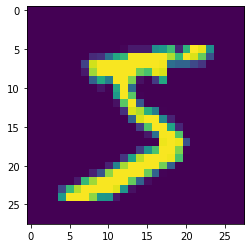

In [6]:
print(X_train.shape)
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # adding channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# checking class lables
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# converting 1D class labels into 10D class matrices - One hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Function to visulaze 1st layer images after using filters on i/p images for MNIST

**Usage** : `vis_img_in_filter(model, image:'numpy.ndarray', layer_name:'str'='conv2d_1')`

> img is expected from train set and in keras inbuilt mnist data format

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(model, image = X_train[2], 
                      layer_name = 'conv2d_1'):
    img=np.array(image).reshape((1, 28, 28, 1)).astype(np.float64)
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])
      
        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


## All CNN architectures tried

In [14]:
model1 = Sequential()
model1.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # convolve 28x28x1 with 3x3x1x32 filters -> 26x26x32 Feature Maps
model1.add(Conv2D(64, 3, 3, activation='relu'))  # conv 26x26x32 with 3x3x32x64 filter -> 24x24x64 Feature Maps
model1.add(MaxPooling2D(2))                      # Maxpool -> 12x12x64
model1.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 12x12x64 with 1x1x64x32 -> 12x12x32 F maps
model1.add(Conv2D(32, 3, 3, activation='relu'))  # conv 12x12x32 with 3x3x32x32 filters -> 10x10x32 F Maps
model1.add(Conv2D(64, 3, 3, activation='relu'))  # conv 10x10x32 with 3x3x32x64 -> 8x8x64 f maps
model1.add(MaxPooling2D(2))                      # Maxpool -> 4x4x64
model1.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 4x4x64 with 1x1x64x32 -> 4x4x32 F maps
model1.add(Conv2D(32, 3, 3, activation='relu'))  # conv 4x4x32 with 3x3x32x32 filters -> 2x2x32 F Maps
model1.add(MaxPooling2D(2))                      # Maxpool -> 1x1x32
model1.add(Conv2D(10, 1, 1, activation='relu'))  # Magic conv 1x1x32 with 1x1x32x10 -> 1x1x10 F maps
model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':


In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [16]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model1.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 24s 406us/step - loss: 0.2051 - acc: 0.9357
Epoch 2/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0610 - acc: 0.9819
Epoch 3/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0443 - acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0346 - acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0296 - acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0256 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0214 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0178 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 16s 271us/step - loss: 0

In [19]:
score = model1.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 76us/step
[0.04234278006501845, 0.9885]


*Test accuracy for the model after 10 epochs with batch size of 32 is 0.9885*



Same network for 20 epochs

In [65]:
model1_20 = Sequential()
model1_20.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # convolve 28x28x1 with 3x3x1x32 filters -> 26x26x32 Feature Maps
model1_20.add(Conv2D(64, 3, 3, activation='relu'))  # conv 26x26x32 with 3x3x32x64 filter -> 24x24x64 Feature Maps
model1_20.add(MaxPooling2D(2))                      # Maxpool -> 12x12x64
model1_20.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 12x12x64 with 1x1x64x32 -> 12x12x32 F maps
model1_20.add(Conv2D(32, 3, 3, activation='relu'))  # conv 12x12x32 with 3x3x32x32 filters -> 10x10x32 F Maps
model1_20.add(Conv2D(64, 3, 3, activation='relu'))  # conv 10x10x32 with 3x3x32x64 -> 8x8x64 f maps
model1_20.add(MaxPooling2D(2))                      # Maxpool -> 4x4x64
model1_20.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 4x4x64 with 1x1x64x32 -> 4x4x32 F maps
model1_20.add(Conv2D(32, 3, 3, activation='relu'))  # conv 4x4x32 with 3x3x32x32 filters -> 2x2x32 F Maps
model1_20.add(MaxPooling2D(2))                      # Maxpool -> 1x1x32
model1_20.add(Conv2D(10, 1, 1, activation='relu'))  # Magic conv 1x1x32 with 1x1x32x10 -> 1x1x10 F maps
model1_20.add(Flatten())
model1_20.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':


In [29]:
model1_20.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0134 - acc: 0.9959
Epoch 2/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0129 - acc: 0.9960
Epoch 3/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.0110 - acc: 0.9962
Epoch 4/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0110 - acc: 0.9963
Epoch 5/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0107 - acc: 0.9968
Epoch 6/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0095 - acc: 0.9971
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0084 - acc: 0.9974
Epoch 8/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0088 - acc: 0.9972
Epoch 9/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0092 - acc: 0.9972
Epoch 10/20
60000/60000 [==============================] - 16s 272us/step - loss: 

In [30]:
score = model1_20.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 76us/step
[0.05003827001977261, 0.9895]


*Test accuracy for the model after 20 epochs with batch size of 32 is 0.9895*

There is not significant improvement

Same network for 30 epochs

In [59]:
model1_30 = Sequential()
model1_30.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # convolve 28x28x1 with 3x3x1x32 filters -> 26x26x32 Feature Maps
model1_30.add(Conv2D(64, 3, 3, activation='relu'))  # conv 26x26x32 with 3x3x32x64 filter -> 24x24x64 Feature Maps
model1_30.add(MaxPooling2D(2))                      # Maxpool -> 12x12x64
model1_30.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 12x12x64 with 1x1x64x32 -> 12x12x32 F maps
model1_30.add(Conv2D(32, 3, 3, activation='relu'))  # conv 12x12x32 with 3x3x32x32 filters -> 10x10x32 F Maps
model1_30.add(Conv2D(64, 3, 3, activation='relu'))  # conv 10x10x32 with 3x3x32x64 -> 8x8x64 f maps
model1_30.add(MaxPooling2D(2))                      # Maxpool -> 4x4x64
model1_30.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 4x4x64 with 1x1x64x32 -> 4x4x32 F maps
model1_30.add(Conv2D(32, 3, 3, activation='relu'))  # conv 4x4x32 with 3x3x32x32 filters -> 2x2x32 F Maps
model1_30.add(MaxPooling2D(2))                      # Maxpool -> 1x1x32
model1_30.add(Conv2D(10, 1, 1, activation='relu'))  # Magic conv 1x1x32 with 1x1x32x10 -> 1x1x10 F maps
model1_30.add(Flatten())
model1_30.add(Activation('softmax'))
model1_30.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model1_30.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1)

score = model1_30.evaluate(X_test, y_test)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':


Epoch 1/30
60000/60000 [==============================] - 19s 315us/step - loss: 0.3155 - acc: 0.8931
Epoch 2/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0511 - acc: 0.9841
Epoch 3/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0385 - acc: 0.9886
Epoch 4/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.0307 - acc: 0.9906
Epoch 5/30
60000/60000 [==============================] - 17s 282us/step - loss: 0.0253 - acc: 0.9916
Epoch 6/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0225 - acc: 0.9931
Epoch 7/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.0192 - acc: 0.9940
Epoch 8/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.0177 - acc: 0.9945
Epoch 9/30
60000/60000 [==============================] - 17s 278us/step - loss: 0.0161 - acc: 0.9946
Epoch 10/30
60000/60000 [==============================] - 17s 283us/step - loss: 

***Test accuracy for the model after 30 epochs with batch size of 32 is 0.9926***


In [0]:
y_pred = model1.predict(X_test)

In [21]:
print(y_pred[0])
print(y_test[0])

[8.0374207e-11 3.3794540e-11 2.3080827e-07 3.2058999e-08 3.3794540e-11
 3.3794540e-11 3.3794540e-11 9.9999976e-01 2.5720334e-10 2.0623535e-08]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model1.layers])

In [24]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f088fb77940>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f0890414dd8>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f0890414d68>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f088fbb9780>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f088fbc3a58>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7f088fbc3518>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7f088fbda128>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7f088fbe2978>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7f088fbf0240>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f088fbeb780>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f0890414160>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7f088fbcf860>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x7f088fbe2438>}

#### Filters visuals

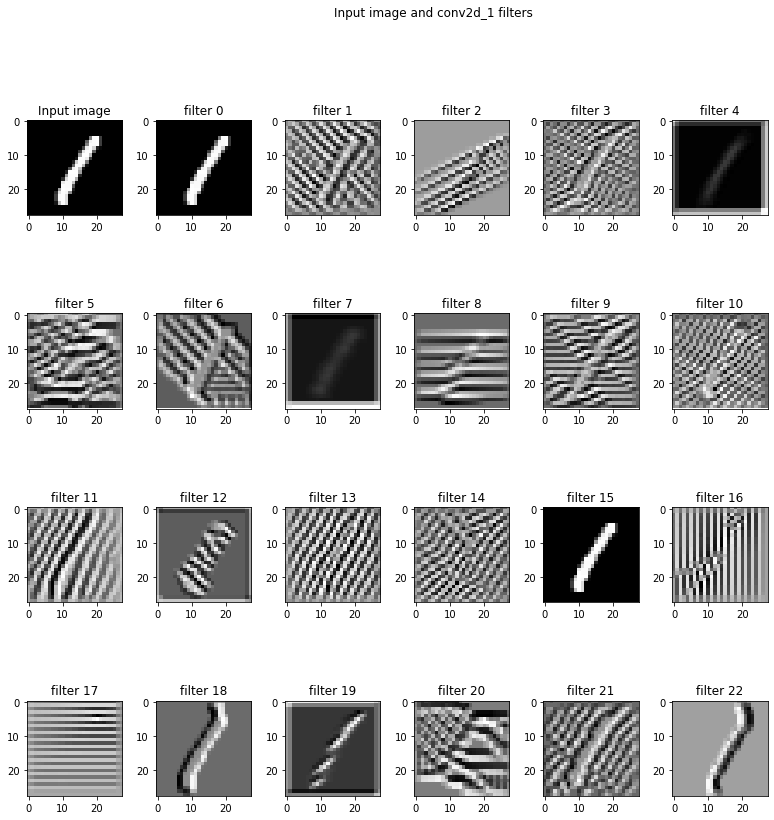

In [25]:
vis_img_in_filter(model1, image=X_train[3],layer_name = 'conv2d_1')

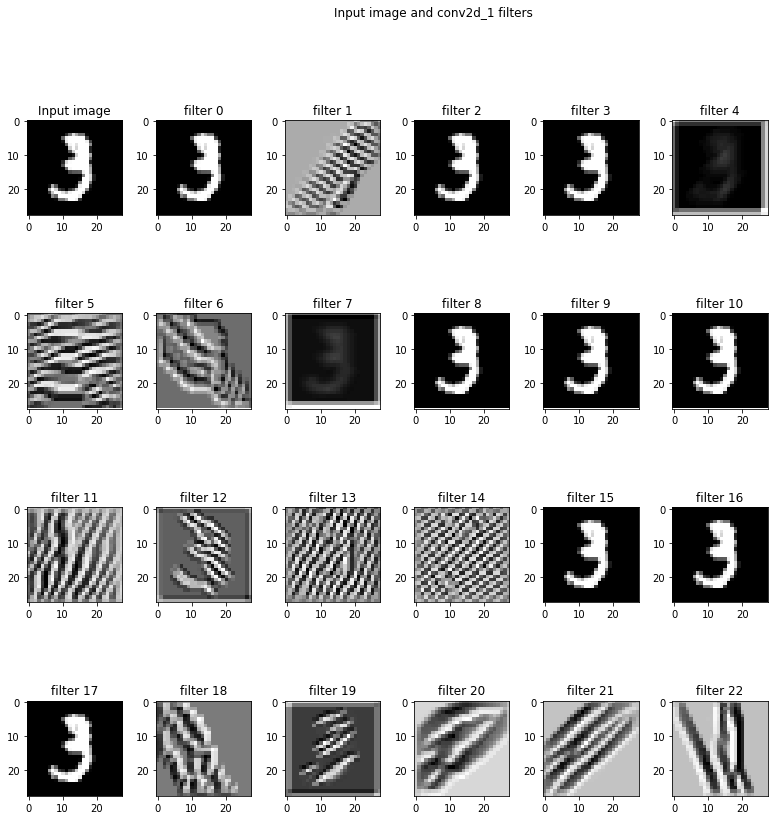

In [78]:
vis_img_in_filter(model1, image=X_train[10],layer_name = 'conv2d_1')

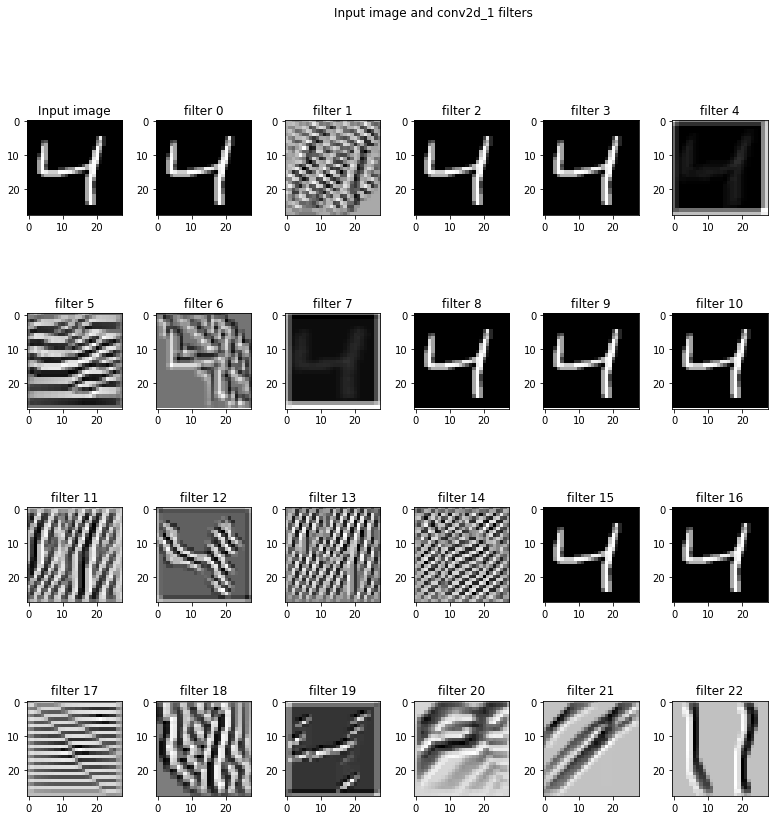

In [79]:
vis_img_in_filter(model1, image=X_train[2],layer_name = 'conv2d_1')

### Other architectures


In [27]:
model2 = Sequential()

model2.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 28x28x1 with 3x3x1x32 -> 26x26x32
model2.add(Conv2D(64, 3, 3, activation='relu'))   # 26x26x32 with 3x3x32x64 -> 24x24x64
# model2.add(Conv2D(64, 3, 3, activation='relu'))   # 26x26x32 with 3x3x32x64 -> 24x24x64

model2.add(MaxPooling2D(2))                       # 12x12x64
model2.add(Conv2D(32, 3, 3, activation='relu'))     # 12x12x64 with 3x3x64x32 -> 10x10x32
model2.add(Conv2D(64, 3, 3, activation='relu'))   # 10x10x32 with 3x3x32x64 -> 8x8x64
model2.add(Conv2D(128, 3, 3, activation='relu'))   # 8x8x64 with 3x3x64x128 -> 6x6x128
model2.add(MaxPooling2D(2))                         # Maxpooling -> 3x3x128
model2.add(Conv2D(10, 3, 3, activation='relu'))   # 3x3x128 with 3x3x128x10 -> 1x1x10
model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)        

In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.9218 - acc: 0.6019
Epoch 2/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.9194 - acc: 0.6024
Epoch 3/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.9203 - acc: 0.6021
Epoch 4/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.9211 - acc: 0.6017
Epoch 5/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.9197 - acc: 0.6022
Epoch 6/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.9197 - acc: 0.6023
Epoch 7/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.9203 - acc: 0.6021
Epoch 8/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.9186 - acc: 0.6023
Epoch 9/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.9199 - acc: 0.6023
Epoch 10/20
60000/60000 [==============================] - 15s 246us/step - loss: 

In [81]:
score = model2.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 87us/step
[0.7427483693122864, 0.6866]


In [36]:
model3 = Sequential()
model3.add(Conv2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) # convolve 28x28x1 with 3x3x1x64 filters -> 26x26x32 Feature Maps
model3.add(Conv2D(128, 3, 3, activation='relu'))  # conv 26x26x32 with 3x3x64x128 filter -> 24x24x128 Feature Maps
model3.add(MaxPooling2D(2))                      # Maxpool -> 12x12x128
model3.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 12x12x128 with 1x1x128x32 -> 12x12x32 F maps
model3.add(Conv2D(64, 3, 3, activation='relu'))  # conv 12x12x32 with 3x3x32x64 filters -> 10x10x64 F Maps
model3.add(Conv2D(128, 3, 3, activation='relu')) # conv 10x10x64 with 3x3x64x128 -> 8x8x128 f maps
model3.add(MaxPooling2D(2))                      # Maxpool -> 4x4x128
model3.add(Conv2D(32, 1, 1, activation='relu'))  # Magic conv 4x4x128 with 1x1x128x32 -> 4x4x32 F maps
model3.add(Conv2D(32, 3, 3, activation='relu'))  # conv 4x4x32 with 3x3x32x32 filters -> 2x2x32 F Maps
model3.add(MaxPooling2D(2))                      # Maxpool -> 1x1x32
model3.add(Conv2D(10, 1, 1, activation='relu'))  # Magic conv 1x1x32 with 1x1x32x10 -> 1x1x10 F maps
model3.add(Flatten())
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 32)        4128      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

In [0]:
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [72]:
model3.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.6985 - acc: 0.6978
Epoch 2/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.7013 - acc: 0.6971
Epoch 3/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.6988 - acc: 0.6979
Epoch 4/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.6985 - acc: 0.6980
Epoch 5/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.7000 - acc: 0.6975
Epoch 6/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.6990 - acc: 0.6976
Epoch 7/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.6987 - acc: 0.6978
Epoch 8/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.6999 - acc: 0.6975
Epoch 9/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.6991 - acc: 0.6977
Epoch 10/20
60000/60000 [==============================] - 17s 289us/step - loss: 

In [73]:
score = model3.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 94us/step
[0.7406525455474854, 0.693]


In [40]:
model4 = Sequential()
model4.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model4.add(Conv2D(64, 3, 3, activation='relu'))	#26
model4.add(Conv2D(128, 3, 3, activation='relu')) # 24
model4.add(Conv2D(256, 3, 3, activation='relu')) # 22
model4.add(MaxPooling2D(2)) # 11
model4.add(Conv2D(32, 1, 1, activation='relu')) # 11 
model4.add(Conv2D(32, 3, 3, activation='relu')) # 9
model4.add(Conv2D(64, 3, 3, activation='relu')) #7
model4.add(MaxPooling2D(2))	# 3
model4.add(Conv2D(32, 1, 1, activation='relu')) # 3 
model4.add(Conv2D(32, 3, 3, activation='relu')) # 1 
model4.add(Conv2D(10, 1, 1, activation='relu')) # 1 
model4.add(Flatten())
model4.add(Activation('softmax'))
model4.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 32)        8224      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 32)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  import sys
/usr/local/l

In [0]:
model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model4.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.6906 - acc: 0.8004
Epoch 2/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.6898 - acc: 0.8005
Epoch 3/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.6902 - acc: 0.8004
Epoch 4/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.6890 - acc: 0.8006
Epoch 5/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.6891 - acc: 0.8009
Epoch 6/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.6901 - acc: 0.8004
Epoch 7/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.6886 - acc: 0.8009
Epoch 8/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.6910 - acc: 0.8001
Epoch 9/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.6888 - acc: 0.8007
Epoch 10/20
60000/60000 [==============================] - 22s 360us/step - loss: 

In [75]:
score = model4.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 115us/step
[0.7402312784194947, 0.7885]


In [44]:
model5 = Sequential()
model5.add(Conv2D(64, 3, activation='relu', input_shape=(28,28,1)))
model5.add(Conv2D(128, 3, activation='relu'))	#24
model5.add(MaxPooling2D(2)) # 12
model5.add(Conv2D(64, 1, activation='relu')) # 12
model5.add(Conv2D(64, 3, activation='relu')) # 10
model5.add(Conv2D(128, 3, activation='relu')) # 8 
model5.add(MaxPooling2D(2)) # 4
model5.add(Conv2D(64, 1, activation='relu')) # 4
model5.add(Conv2D(64, 3, activation='relu')) #2
model5.add(MaxPooling2D(2))	 #1
model5.add(Conv2D(10, 1, 1, activation='relu')) # 1 
model5.add(Flatten())
model5.add(Activation('softmax'))
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':


In [0]:
model5.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
model5.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.7315 - acc: 0.6844
Epoch 2/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.7333 - acc: 0.6842
Epoch 3/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.7309 - acc: 0.6846
Epoch 4/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.7353 - acc: 0.6841
Epoch 5/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.7300 - acc: 0.6848
Epoch 6/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.7323 - acc: 0.6842
Epoch 7/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.7325 - acc: 0.6844
Epoch 8/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.7298 - acc: 0.6848
Epoch 9/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.7328 - acc: 0.6843
Epoch 10/20
60000/60000 [==============================] - 17s 288us/step - loss: 

In [77]:
score = model5.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 2s 187us/step
[0.771019394493103, 0.6785]


# Final Model

In [47]:
model6 = Sequential()
model6.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1)))
model6.add(Conv2D(64, 3, activation='relu')) 
model6.add(MaxPooling2D(2))                  
model6.add(Conv2D(32, 3, activation='relu')) 
model6.add(Conv2D(64, 3, activation='relu')) 
model6.add(MaxPooling2D(2))                  
model6.add(Conv2D(32, 3, activation='relu')) 
model6.add(MaxPooling2D(2))                  
model6.add(Conv2D(10, 1, activation='relu')) 
model6.add(Flatten())
model6.add(Activation('softmax'))
model6.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 2, 2, 32)         

In [0]:
model6.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [49]:
model6.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.1694 - acc: 0.9482
Epoch 2/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0513 - acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0362 - acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0287 - acc: 0.9913
Epoch 5/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.0234 - acc: 0.9924
Epoch 6/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0195 - acc: 0.9939
Epoch 7/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0152 - acc: 0.9953
Epoch 8/20
60000/60000 [==============================] - 14s 242us/step - loss: 0.0131 - acc: 0.9958
Epoch 9/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0128 - acc: 0.9959
Epoch 10/20
60000/60000 [==============================] - 14s 239us/step - loss: 

In [50]:
score = model6.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 131us/step
[0.033343484246313164, 0.9933]


## Futher Experiments
Trying filter numbers as multiples of 8 and a different architecture 
 > I got to know that GPUs are accelerated for multiples of 8, creating networks using the info, visualizing first layer filters and see what difference does it make

In [35]:
model2 = Sequential()

model2.add(Conv2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 28x28x1x8 with 3x3x1x8 -> 26x26x8
model2.add(Conv2D(16, 3, 3, activation='relu'))   # 26x26x8 with 3x3x8x16 -> 24x24x16
# reached receptive field of 5
# transition
model2.add(MaxPooling2D(2))   # Maxpooling -> 12x12x16
# model2.add(Conv2D(8, 1, 1, activation='relu'))    # 12x12x16 with 1x1x16x8 -> 12x12x8
#
model2.add(Conv2D(8, 3, 3, activation='relu'))     # 12x12x16 with 3x3x16x8 -> 10x10x8
model2.add(Conv2D(16, 3, 3, activation='relu'))   # 10x10x8 with 3x3x8x16 -> 8x8x16
model2.add(Conv2D(32, 3, 3, activation='relu'))   # 8x8x16 with 3x3x16x32 -> 6x6x32
# model2.add(Conv2D(64, 3, 3, activation='relu'))    # 6x6x32 with 3x3x32x64 -> 4x4x64
# model2.add(Conv2D(10, 1, 1, activation='relu'))   # 2x2x64 -> MaxPool -> 1x1x10
model2.add(MaxPooling2D(2))   # Maxpooling -> 3x3x32
model2.add(Conv2D(10, 3, 3, activation='relu'))   # 3x3x32 with 3x3x32x10 -> 1x1x10
model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 AP

In [36]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 16)          1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)         

In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model2.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.7910 - acc: 0.6983
Epoch 2/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.5293 - acc: 0.7861
Epoch 3/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.5123 - acc: 0.7894
Epoch 4/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.5033 - acc: 0.7911
Epoch 5/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.4969 - acc: 0.7920
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.4911 - acc: 0.7934
Epoch 7/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.4872 - acc: 0.7942
Epoch 8/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.4851 - acc: 0.7946
Epoch 9/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.4832 - acc: 0.7954
Epoch 10/10
60000/60000 [==============================] - 17s 290us/step - loss: 

In [40]:
dict([(layer.name, layer) for layer in model2.layers])

{'activation_2': <keras.layers.core.Activation at 0x7f816b227da0>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0x7f81667e8dd8>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x7f8166c3b048>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x7f816b1fb588>,
 'conv2d_13': <keras.layers.convolutional.Conv2D at 0x7f8166c3e588>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7f816b1facf8>,
 'conv2d_9': <keras.layers.convolutional.Conv2D at 0x7f81667e8e80>,
 'flatten_2': <keras.layers.core.Flatten at 0x7f816b1f7d68>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7f81667e82b0>,
 'max_pooling2d_5': <keras.layers.pooling.MaxPooling2D at 0x7f8166c490f0>}

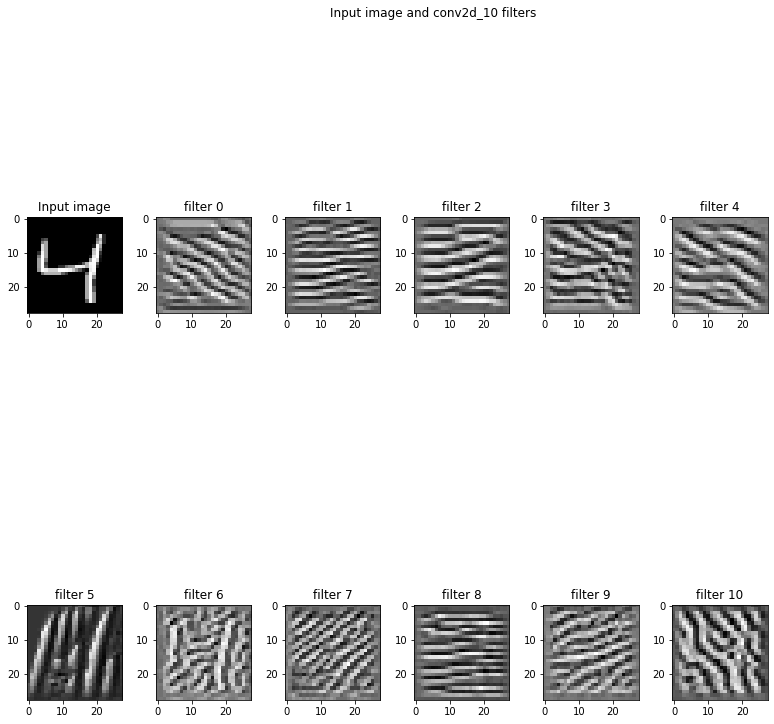

In [42]:
vis_img_in_filter(model2, image=X_train[2],layer_name = 'conv2d_10')

## Code from session

In [0]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation = 'relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 33s 553us/step - loss: 0.1978 - acc: 0.9426
Epoch 2/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0756 - acc: 0.9772
Epoch 3/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0557 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0449 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0365 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 31s 521us/step - loss: 0.0288 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0241 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 32s 525us/step - loss: 0.0194 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 31s 523us/step - loss: 0.0164 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 31s 519us/step -

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 2s 151us/step


In [0]:
print(score)

[0.07837501554603077, 0.9813]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[0])
print(y_test[0])

[9.9528271e-20 1.6868957e-19 1.2736036e-14 8.6590852e-08 5.1508235e-22
 6.1059760e-17 2.4294451e-34 9.9999988e-01 9.5101982e-12 8.1357955e-11]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_2': <keras.layers.core.Activation at 0x7f666197cf60>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7f666e373978>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7f666e3865f8>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7f666e386be0>,
 'flatten_2': <keras.layers.core.Flatten at 0x7f66619d9630>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])
      
        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


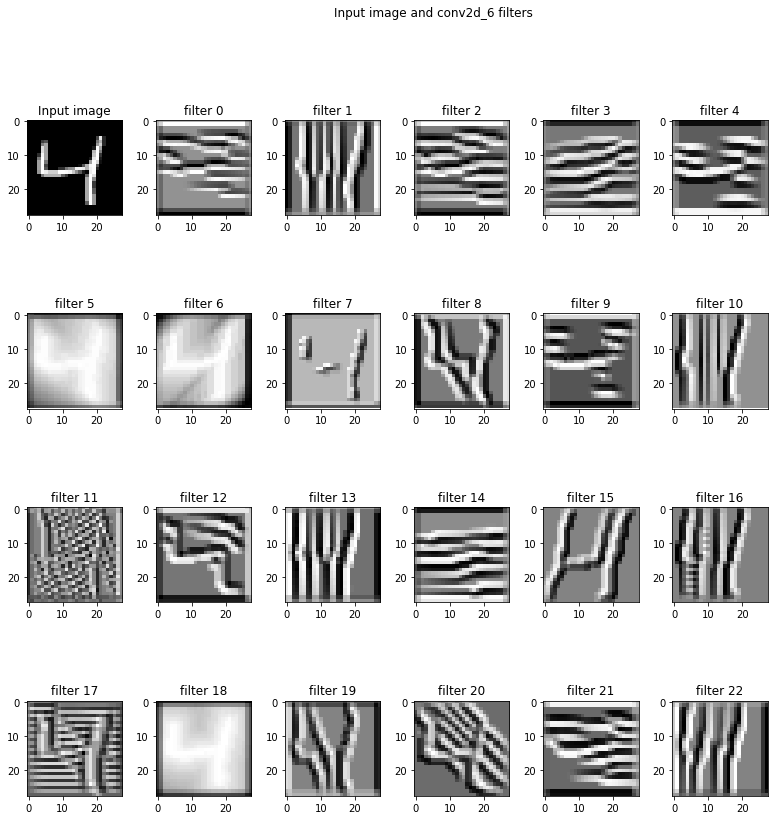

In [0]:
image_np=np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)
vis_img_in_filter(img=image_np, layer_name = 'conv2d_6')